In [1]:
weather_filename = 'data/fort_lauderdale.csv'
weather_file = open(weather_filename)
weather_data = weather_file.read()
weather_file.close()

In [2]:
print(len(weather_data))
print(weather_data[:200])

1308834
COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP
83168,1952,1,1,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,2,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,3,-9


In [3]:
# Break the weather records into lines
lines = weather_data.split('\n')
print(len(lines))
print(lines[:5])

24154
['COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP', '83168,1952,1,1,-99.99000,-99.90000,-99.90000, -99.90000', '83168,1952,1,2,-99.99000,-99.90000,-99.90000, -99.90000', '83168,1952,1,3,-99.99000,-99.90000,-99.90000, -99.90000', '83168,1952,1,4,-99.99000,-99.90000,-99.90000, -99.90000']


In [4]:
for i in range(5):
    print(lines[i])

COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP
83168,1952,1,1,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,2,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,3,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,4,-99.99000,-99.90000,-99.90000, -99.90000


In [5]:
labels = lines[0]
values = lines[1:]
n_values = len(values)

print(labels)
for i in range(10):
    print(values[i])

COOPID, YEAR, MONTH, DAY, PRECIPITATION, MAX TEMP, MIN TEMP, MEAN TEMP
83168,1952,1,1,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,2,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,3,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,4,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,5,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,6,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,7,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,8,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,9,-99.99000,-99.90000,-99.90000, -99.90000
83168,1952,1,10,-99.99000,-99.90000,-99.90000, -99.90000


In [6]:
# Splitting the list of csv into lists of values
year = []
month = []
day = []
max_temp = []
j_year = 1
j_month = 2
j_day = 3
j_max_temp = 5

In [7]:
for i_row in range(n_values):
    split_values = values[i_row].split(',')
    #print(split_values)
    year.append(int(split_values[j_year]))
    month.append(int(split_values[j_month]))
    day.append(int(split_values[j_day]))
    max_temp.append(float(split_values[j_max_temp]))

In [8]:
print(year[:20])

[1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952]


In [9]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
from IPython.core.pylabtools import figsize

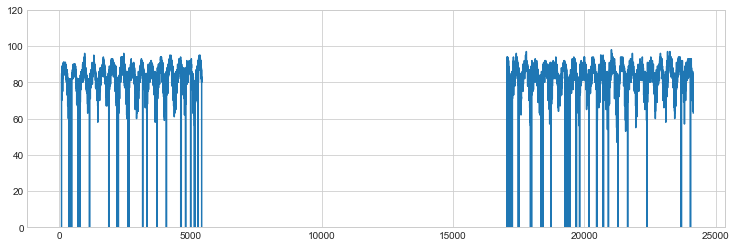

In [10]:
figsize(12.5, 4)
plt.plot(max_temp)
plt.ylim(0, 120);

In [11]:
import numpy as np

# Isolate the recent data
i_mid = len(max_temp) // 2

temps = np.array(max_temp[i_mid:])
temps[np.where(temps == -99.9)] = np.nan

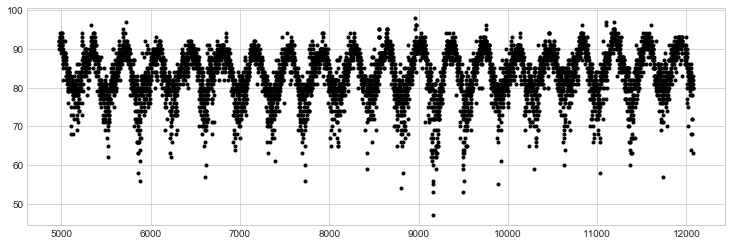

In [12]:
plt.plot(temps, color='k', marker='.', linestyle='none');

In [13]:
# Remove all the nan's
print(np.where(np.isnan(temps))[0])

[    0     1     2 ... 11978 11979 11980]


In [14]:
print(np.where(np.logical_not(np.isnan(temps)))[0][0])

4973


In [15]:
i_start = np.where(np.logical_not(np.isnan(temps)))[0][0]
temps = temps[i_start:]
print(np.where(np.isnan(temps))[0])

[  62   69   73   83   91  157  212  441  442  443  456  457  905  944
 1310 1383 1387 1676 2229 2230 2231 2232 2235 2236 2252 2253 2254 2255
 2328 2329 2408 2630 2646 2647 2648 2649 2650 2651 2652 2653 2654 2655
 2656 2657 2658 2659 2774 3140 3423 3424 3429 3439 3440 3444 3669 3677
 3678 3680 3681 3872 4238 4604 5336 6630 6631 6652 6988 6989 6990 6991
 6992 6993 6994 6995 6996 6997 6998 6999 7000 7001 7002 7003 7004 7005
 7006 7007]


In [16]:
i_nans = np.where(np.isnan(temps))[0]
print(np.diff(i_nans))

[   7    4   10    8   66   55  229    1    1   13    1  448   39  366
   73    4  289  553    1    1    1    3    1   16    1    1    1   73
    1   79  222   16    1    1    1    1    1    1    1    1    1    1
    1    1    1  115  366  283    1    5   10    1    4  225    8    1
    2    1  191  366  366  732 1294    1   21  336    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1]


In [17]:
# Replace all nans with the most recent non-nan.
for i in range(temps.size):
    if np.isnan(temps[i]):
        temps[i] = temps[i - 1]

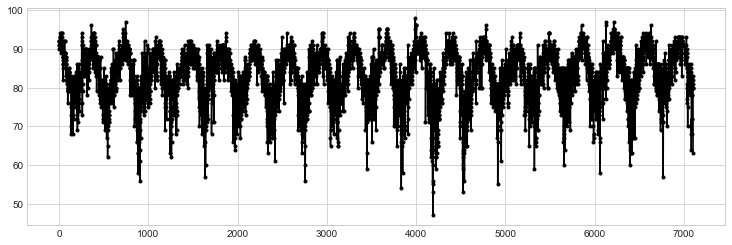

In [18]:
plt.plot(temps, color='k', marker='.');